In [1]:
# Calculate power for t-test
# where the two groups have unequal variance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [3]:
# Preliminary (made up) data
dat = pd.DataFrame({"AnimalID": ["a", "b", "c", "d", "e", "f"], 
                    "Treatment": ["ctrl", "trt", "ctrl", "trt", "ctrl", "trt"], 
                    "Diff": [0, 2, -2, 3, 1, 12]})
dat

,AnimalID,Treatment,Diff
0,a,ctrl,0
1,b,trt,2
2,c,ctrl,-2
3,d,trt,3
4,e,ctrl,1
5,f,trt,12


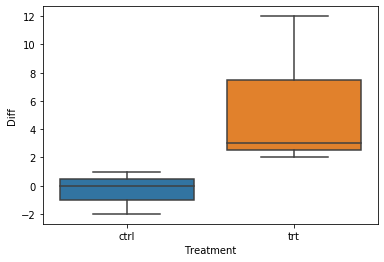

In [4]:
# plot data
sns.boxplot(x= "Treatment", y = "Diff", data = dat)
plt.show()

In [8]:
# calculate mean and sd of original data
result = dat.groupby(['Treatment'], as_index=True).agg(
                      {'Diff':['mean','std', "count"]})
result

Diff                
               mean       std count
Treatment                          
ctrl      -0.333333  1.527525     3
trt        5.666667  5.507571     3

In [10]:
def simulate_test(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                  samp_size_trt,  mean_trt,  sd_trt):
    '''
    Simulate data from two normal distributions and calculate p-value
    from t-test (assuming unequal variance)
    
        Args: 
        sample sizes, means, and sd's from control and trt groups

        Returns:
        p-value from simulated data
    '''
    simdata_ctrl = np.random.normal(loc = mean_ctrl, scale = sd_ctrl, size = samp_size_ctrl)
    simdata_trt = np.random.normal(loc = mean_trt, scale = sd_trt, size = samp_size_trt)
    _, p = stats.ttest_ind(simdata_ctrl, simdata_trt, equal_var = False)
    return(p)

In [11]:
samp_size_ctrl = 9
mean_ctrl = -0.33
sd_ctrl = 1.52

samp_size_trt = 9
mean_trt = 5.7
sd_trt = 5.5

# simulate 10000 samples
simulated_pvals = [simulate_test(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                                 samp_size_trt, mean_trt, sd_trt) for ii in range(10000)]

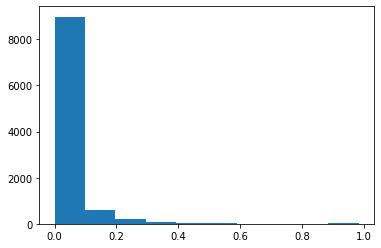

Power for sample size ( 9 9 ) =  0.8082


In [12]:
plt.hist(simulated_pvals)
plt.show()

# report power
print("Power for sample size (", samp_size_ctrl, samp_size_trt, ") = ",np.mean(np.array(simulated_pvals) < 0.05))

In [ ]:
# according to above, to get a power of 0.8, we'd need a sample size of 9 individuals per group

In [2]:
import statsmodels.stats.power as smp
import numpy as np

In [36]:
pc = smp.FTestPower()

In [44]:
pwr = []

for nobs in range(5, 50):
    pwr.append(pc.solve_power(nobs = nobs, effect_size= 0.5, alpha = 0.05, df_num = 4, df_denom=nobs - 4))

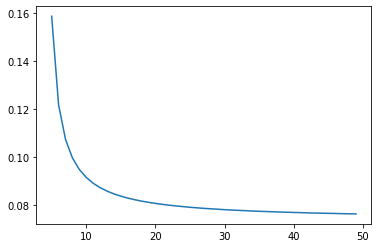

In [45]:
import matplotlib.pyplot as plt
plt.plot(range(5, 50), pwr)